# Functions

If you don't create a function, ouhave to recreate the code every time you want to use it. This can get really tedious if you have to reuse or recreate a long code many times. Let's take a look at an example of creating a code without the use of functions:

In [1]:
lst1 = [1,2,3,4,5]
lst2 = [i * 2 for i in range(1,6)]
total = 0
for val in lst1:
    total = total + val
    print ("val:", val, "total:", total)
    
print("total of values from lst1:", total)
print("lst2:", lst2)

total = 0
for val in lst2:
    total = total + val
    print("val:", val, "total:", total)
print("total of values from lst2:", total)

#if you need to use the total of lst1 or lst2 at a later time, you'll need to recreate the code
#because they weren't saved as a function. 

val: 1 total: 1
val: 2 total: 3
val: 3 total: 6
val: 4 total: 10
val: 5 total: 15
total of values from lst1: 15
lst2: [2, 4, 6, 8, 10]
val: 2 total: 2
val: 4 total: 6
val: 6 total: 12
val: 8 total: 20
val: 10 total: 30
total of values from lst2: 30


**Building a function allows us to reuse the code without rebuilding it. Let's see how we can rebuild the code above and save it as a function**
> Every function in python starts by using "def" followed by the name you decide to give to the function

In [2]:
def total(lst_obj):
    total = 0                # we make total to be equal to zero because we'll be adding to it. 
    n = len(lst_obj)         #len is the length of the list
    for i in range (n):
        total += lst_obj[i]   #go through all the list and add the value for e.g. a += b is shorthand for a = a + b
                              # this block of code says call every i in the list then add it to the total (+=)
            
     # return command outputs whatever value or variable is after return   
    return total
       
    # the block of code below is another way for writing for i in range(n)... It should give the same result
#    for i in range (n)    
#        val = lst_obj[i]
#        total = += val

# The code below is another way of writing for i in range (n):...
#    for val in lst_obj:
#        total += val
        

# note that we'd already defined lst1 and lst2 in the example above. So, python already has it stored.
# so now we just call it by using the function we've defined above
print("total of lst1:", total(lst1))
print("total of list2", total(lst2))

# if we defined a another list, say list 3, we can just call it using the function we've defined. 
lst3 = list(range(1,10,1))

#now let's calculate the total of list 3 using the function we've defined above. 
print ("total of lst3:", total(lst3))


# let's create a function to calculate the mean

def mean(lst_obj):
    n = len(lst_obj)            #again, len counts or identies the number of items or elements in the list
    mean_= total(lst_obj) / n   #note that we are calling the total function here which we already defined above
    return mean_


#let's create a function to calculate the median
def median(lst_obj):
    n = len(lst_obj)
    lst_obj = sorted(lst_obj)    #this sorts the list or order's the list by value in ascending order
    
    #if the list is not even
    if n % 2 != 0:
       
        #the middle index which will be the position occupied by the mediam on the list will be n-1/2. 
        # Note that if the length is 5, the first element is 0 and the fifth element is 4.
        #the median will be 5-1/2 which is the 2rd position on the list which in this case is 2. 
        #this works if the list range starts counting from zero. 
        middle_index = int((n-1)/2)
        median_ = lst_obj[middle_index]    
        
    else:
        upper_middle_index = int ( n / 2)
        lower_middle_index = upper_middle_index - 1
        # take the average of the two middle numbers
        
        #we've defined the mean function above so we can call it to get the mean of the upper and lower middle indices
        median_ = mean(lst_obj[lower_middle_index:upper_middle_index + 1])
        
        #we can also write the mean code above as seen below:
        #it simply gets the mean of the upper and lower indices
        #this option creates two lists, for upper and lower indices then gets the mean
        #the code above simply puts both the lower and upper indices in one list then finds the mean
        #mediam_ = mean([lst_obj[lower_middle_index], lst_obj[upper_middle_index]])
        
    return median_


#let's create the mode function
def mode(lst_obj):
   #max count records values that appear the most. So, we start with a count of 0
    max_count = 0       
    
    #we create a dictionary to record the number of times each value appears in the list 
    counter_dict = {}
    
    #now, we're going to make an entry for each value in the list, 
    # we'll start by setting the value in the dictionary to zero
    for value in lst_obj:
        counter_dict[value] = 0
    print("counter_dict sets all counts to 0 for each value", counter_dict)
        
    #we'll run through the list again and every time there's a value, we'll add one to it.     
    for value in lst_obj:
        counter_dict[value] += 1 
    print("counter_dict after adding 1 for appearance of each value", counter_dict)
        
    # find maximum number of times a value appears
    count_list = list(counter_dict.values())
    max_count = max(count_list)
    print("maximum number of times a value appears", max_count)
    
    #now we use a generator to make a list of the values (or keys) whose number of occurences in the list
    # matches max_count
    # note that the items in the list is the key in this case. So, in list [1,1,2,3,4,4], the key here is 1, 2, 3, 4. 
    # and the number of times the items on the list occurs is the value. The value in the list above will be the 
    # number of times those keys occur. That's how the counter_dict dictionary stores the key/values. 
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    
    return mode_
    
#now let's create a function for variance
  # sample = false assumes lst represents population
def variance (lst_obj, sample = False):
        
    #first we need to save the mean list because we'll need it to calculate the var
    lst_mean = mean(lst_obj)
    
    # we'll use n to calculate the average of sum of squared difference
    n = len(lst_obj)
    
    # we create a value we can add squared difference to. setting the value to zero is always a good way to start
    sum_sq_diff = 0
    
    for val in lst_obj:
       
        #now let's get a value for [(xi - x_mean)**2] then add it to sum_sq_diff
        #this behaves same as summation (xi - x_mean)sq. for i, from 1,...n. 
        # so every time it gets a value, it adds or summates it to the previous value
        # thereby getting a summation of all values in lst_obj
        sum_sq_diff += (val - lst_mean) ** 2
        
        #you can also write the above equation as..
        #sum_sq_diff = sum_sq_diff + (val - lst_mean) ** 2
#        print("sum of squares is:", sum_sq_diff)
        
    if sample == False:
            # normalize result by dividing by n
        variance_ = sum_sq_diff / n
    else:
            #for samples, normalize by dividing by (n-1)
        variance_ = sum_sq_diff / (n-1)
        
    return variance_
    
# now let's create a function for the standard deviation
def SD(lst_obj, sample = False):
    SD_ = variance(lst_obj, sample) ** (1/2)
    return SD_


def covariance(lst_obj1, lst_obj2, sample = False):
#determine the mean of each list    
    mean1 = mean(lst_obj1)
    mean2 = mean(lst_obj2)
    
#innitiate a variable holding teh value of covariance
#sum the values generated in teh for loop
    cov = 0
    n1 = len(lst_obj1)
    n2 = len(lst_obj2)
    
#check if list lengths are equal. This is important when calculating covariance    
    if n1 == n2:
        n = n1
        
        for i in range(n1):
            cov += (lst_obj1[i] - mean1) * (lst_obj2[i]- mean2)
            
        if sample == False:
            cov = cov / n
        else:
            cov = cov / (n-1)
        return cov
    else:
        print("Lists are not of equal length")
        print("Length of list1:", n1)
        print("Length of list2:", n2)  
        
        
def correlation(lst_obj1, lst_obj2):
# correlation(x,y) = cov(x,y) / (SD (x) * SD(y))   
    
    cov = covariance(lst_obj1, lst_obj2)
    SD1 = SD(lst_obj1)
    SD2 = SD(lst_obj2)
    corr = cov / (SD1 * SD2)
    
    return corr
   
#skewness describes the lean of a distribution, whether left or right  
#checkout the formula in textbook
def skewness(lst_obj, sample = False):
    mean_= mean(lst_obj)
    SD_  = SD (lst_obj, sample)
    skew = 0
    n = len(lst_obj)
    for val in lst_obj:
        skew += (val - mean_) ** 3
        skew = skew / (n * SD_ **3) if not sample else n * skew / ((n-1)*(n-2) * SD_** 3)
    return skew

#kurtosis describes how fat the tails of the distribution distribution are.
#also, it tells us how compressed the distributions are around the mean
def kurtosis(list_obj, sample = False):
    mean_ = mean(list_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for x in list_obj:
        kurt += (x - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if not sample else  n * (n + 1) * kurt / \
    ((n - 1) * (n - 2) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt


total of lst1: 15
total of list2 30
total of lst3: 45


>We can also save total(list1) as total1 = total(lst1) then call it when ever we need it for example, print (total1) is the same as print(total(lst1)) because we've defined total1 as total(lst1)

In [3]:
lst1 = [1,2,3,4,5]
lst2 = [i * 2 for i in range(1,6)]
lst3 = list(range(1,10,1))

total1 = total(lst1)
total2 = total(lst2)
total3 = total(lst3)
print("total of lst1:", total1)
print("total of lst2:", total2)
print("total of lst3:", total3)

mean1 = mean(lst1)
mean2 = mean(lst2)
mean3 = mean(lst3)
print("mean of lst1:", mean1)
print("mean of lst2:", mean2)
print("mean of lst3:", mean3)

median1 = median(lst1)
median2 = median(lst2)
median3 = median(lst3)
print("median of lst1:", median1)
print("median of lst2:", median2)
print("median of lst3:", median3)

mode1 = mode(lst1)
mode2 = mode(lst2)
mode3 = mode(lst3)
print("mode of lst1:", mode1)
print("mode of lst2:", mode2)
print("mode of lst3:", mode3)

variance1 = variance(lst1)
variance2 = variance(lst2)
variance3 = variance(lst3)
print("variance of lst1:", variance1)
print("variance of lst2:", variance2)
print("variance of lst3:", variance3)

SD1 = SD(lst1)
SD2 = SD(lst2)
SD3 = SD(lst3)
print("standard deviation of lst1:", SD1)
print("standard deviation of lst2:", SD2)
print("standard deviation of lst3:", SD3)

cov12 = covariance(lst1,lst2)
cov13 = covariance(lst1, lst3)
cov23 = covariance(lst2, lst3)
print("covariance of lst1 and lst2:", cov12)
print("covariance of lst1 and lst3:", cov13)
print("covariance of lst2 and lst3:", cov23)

corr12 = correlation(lst1, lst2)
#note that lst 2 and 3 don't have the same length (n) as lst1. 
#Since they don't have a cov, they can't be used to get a corr either
#corr13 = correlation(lst1, lst3)
#corr23 = correlation(lst2, lst3)
print("correlation of lst1 and lst2:", corr12)

skew1 = skewness(lst1)
skew2 = skewness(lst2)
skew3 = skewness(lst3)
print("skewness lst1:", skew1)
print("skewness lst2:", skew2)
print("skewness lst3:", skew3)

kurt1 = kurtosis(lst1)
kurt2 = kurtosis(lst2)
kurt3 = kurtosis(lst3)
print("kurtosis lst1:", kurt1)
print("kurtosis lst2:", kurt2)
print("kurtosis lst3:", kurt3)

total of lst1: 15
total of lst2: 30
total of lst3: 45
mean of lst1: 3.0
mean of lst2: 6.0
mean of lst3: 5.0
median of lst1: 3
median of lst2: 6
median of lst3: 5
counter_dict sets all counts to 0 for each value {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
counter_dict after adding 1 for appearance of each value {1: 1, 2: 1, 3: 1, 4: 1, 5: 1}
maximum number of times a value appears 1
counter_dict sets all counts to 0 for each value {2: 0, 4: 0, 6: 0, 8: 0, 10: 0}
counter_dict after adding 1 for appearance of each value {2: 1, 4: 1, 6: 1, 8: 1, 10: 1}
maximum number of times a value appears 1
counter_dict sets all counts to 0 for each value {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
counter_dict after adding 1 for appearance of each value {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}
maximum number of times a value appears 1
mode of lst1: [1, 2, 3, 4, 5]
mode of lst2: [2, 4, 6, 8, 10]
mode of lst3: [1, 2, 3, 4, 5, 6, 7, 8, 9]
variance of lst1: 2.0
variance of lst2: 8.0
variance of

>**Let's create a function that gathers statistics for each variable in a dataframe**

In [4]:
#as always, we start by naming the function
# the function below will take a dataframe and calculate statistics in that df
def gather_statistics(df, sample = False): 

# we'll save the calculated statistics in a dictionary   
# for every variable in the dataframe, we'll create an entry 
# and then another dictionary that'll hold each statistic for that variable
    dct = {key:{} for key in df}
    
# take every column name in the df (key), and create a blank dictionary for that column name
# and the values for the key in that column name
    for key, val in df.items():
        
# we'll drop any missing missing values        
        val = val.dropna(axis=0)

# then we'll calc each statistic for each variable;
# the variable name is the key, the column of data is the val
# so, column name is key, column data is val for df.items()
        dct[key]["mean"]     = round(mean(val),3)
        dct[key]["median"]   = round(median(val),3)
#        dct[key]["mode"]     = round(mode(val),3)
        dct[key]["variance"] = round(variance(val),3)
        dct[key]["S.D."]     = round(SD(val),3)
        dct[key]["skewness"] = round(skewness(val),)
        dct[key]["kurtosis"] = round(kurtosis(val), 3)
    stats_df = pd.DataFrame(dct)
    return stats_df
    

>**now let's install pandas-datareader which is a library for downloading data**

If you are using your own computer
> use the command **pip install pandas-datareader** on the command line

If you are not an administrator or if you are not using your own computer, use the command
> **pip install pandas-datareader --user**

In [5]:
import pandas as pd
import pandas_datareader.data as web    #import as web, but could call it something else
import datetime                          #import datetime imports the state date and end date

# date format is (yyyy, mm, dd)
start =  datetime.datetime(2012, 1, 1)
end = datetime.datetime.today()

#save the data in a dictionary
data_dict = {}
stocks = ["MSFT", "AAPL", "FB", "TSLA"]
for name in stocks:
#web.DataReader(stockname, source, start_date, end_date)    
    data_dict[name] = web.DataReader(name, "yahoo", start, end)
    
#we've just installed an API to read stocks from yahoo

>we can view the data for just one type of stock or we can view all the stocks specified in our code

In [6]:
data_dict["MSFT"]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,21.906679
2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.422224
2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,22.651352
2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,23.003237
2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,22.700455
...,...,...,...,...,...,...
2020-09-21,202.710007,196.380005,197.190002,202.539993,39839700.0,202.539993
2020-09-22,208.100006,202.080002,205.059998,207.419998,33517100.0,207.419998
2020-09-23,208.100006,200.029999,207.899994,200.589996,30803800.0,200.589996


In [7]:
data_dict

{'MSFT':                   High         Low        Open       Close      Volume  \
 Date                                                                     
 2012-01-03   26.959999   26.389999   26.549999   26.770000  64731500.0   
 2012-01-04   27.469999   26.780001   26.820000   27.400000  80516100.0   
 2012-01-05   27.730000   27.290001   27.379999   27.680000  56081400.0   
 2012-01-06   28.190001   27.530001   27.530001   28.110001  99455500.0   
 2012-01-09   28.100000   27.719999   28.049999   27.740000  59706800.0   
 ...                ...         ...         ...         ...         ...   
 2020-09-21  202.710007  196.380005  197.190002  202.539993  39839700.0   
 2020-09-22  208.100006  202.080002  205.059998  207.419998  33517100.0   
 2020-09-23  208.100006  200.029999  207.899994  200.589996  30803800.0   
 2020-09-24  205.570007  199.199997  199.850006  203.190002  31151500.0   
 2020-09-25  207.084595  202.539993  203.550003  206.689804  13251738.0   
 
              A

> We can save teh closing price data for all four stocks in a single dataframe

In [8]:
# make a list of the close data for each stock
list_close_datas = [val["Close"] for val in data_dict.values()]

#The list of data will be alligned with keys
data_keys = data_dict.keys()

#pd.concat concatenates each of the close values and makes a list of all close value column in the dictionary
# for the keys, we'll say each val references a key in the dictionary
# axis = 1 concatenates lists horizontally (side by side)
close_data = pd.concat(list_close_datas, keys = data_keys, axis = 1)
close_data

#list_close_datas gives you all teh list of columns of data for each close date
#list_close_datas

,MSFT,AAPL,FB,TSLA
Date,,,,
2012-01-03,26.770000,14.686786,NaN,5.616000
2012-01-04,27.400000,14.765715,NaN,5.542000
2012-01-05,27.680000,14.929643,NaN,5.424000
2012-01-06,28.110001,15.085714,NaN,5.382000
2012-01-09,27.740000,15.061786,NaN,5.450000
...,...,...,...,...
2020-09-21,202.539993,110.080002,248.149994,449.390015
2020-09-22,207.419998,111.809998,254.750000,424.230011
2020-09-23,200.589996,107.120003,249.020004,380.359985


In [9]:
# we can make a list of "volume data" as well
list_volume_datas = [val["Volume"] for val in data_dict.values()]
volume_data = pd.concat(list_volume_datas, keys = data_keys, axis = 1)
volume_data

,MSFT,AAPL,FB,TSLA
Date,,,,
2012-01-03,64731500.0,302220800.0,NaN,4640500.0
2012-01-04,80516100.0,260022000.0,NaN,3150500.0
2012-01-05,56081400.0,271269600.0,NaN,5027500.0
2012-01-06,99455500.0,318292800.0,NaN,4931500.0
2012-01-09,59706800.0,394024400.0,NaN,4485000.0
...,...,...,...,...
2020-09-21,39839700.0,195713800.0,24709400.0,109476800.0
2020-09-22,33517100.0,183055400.0,30293100.0,79580800.0
2020-09-23,30803800.0,150718700.0,19641300.0,95074200.0


**Now let's visualize our data and draw a plot diagram using matplotlib**

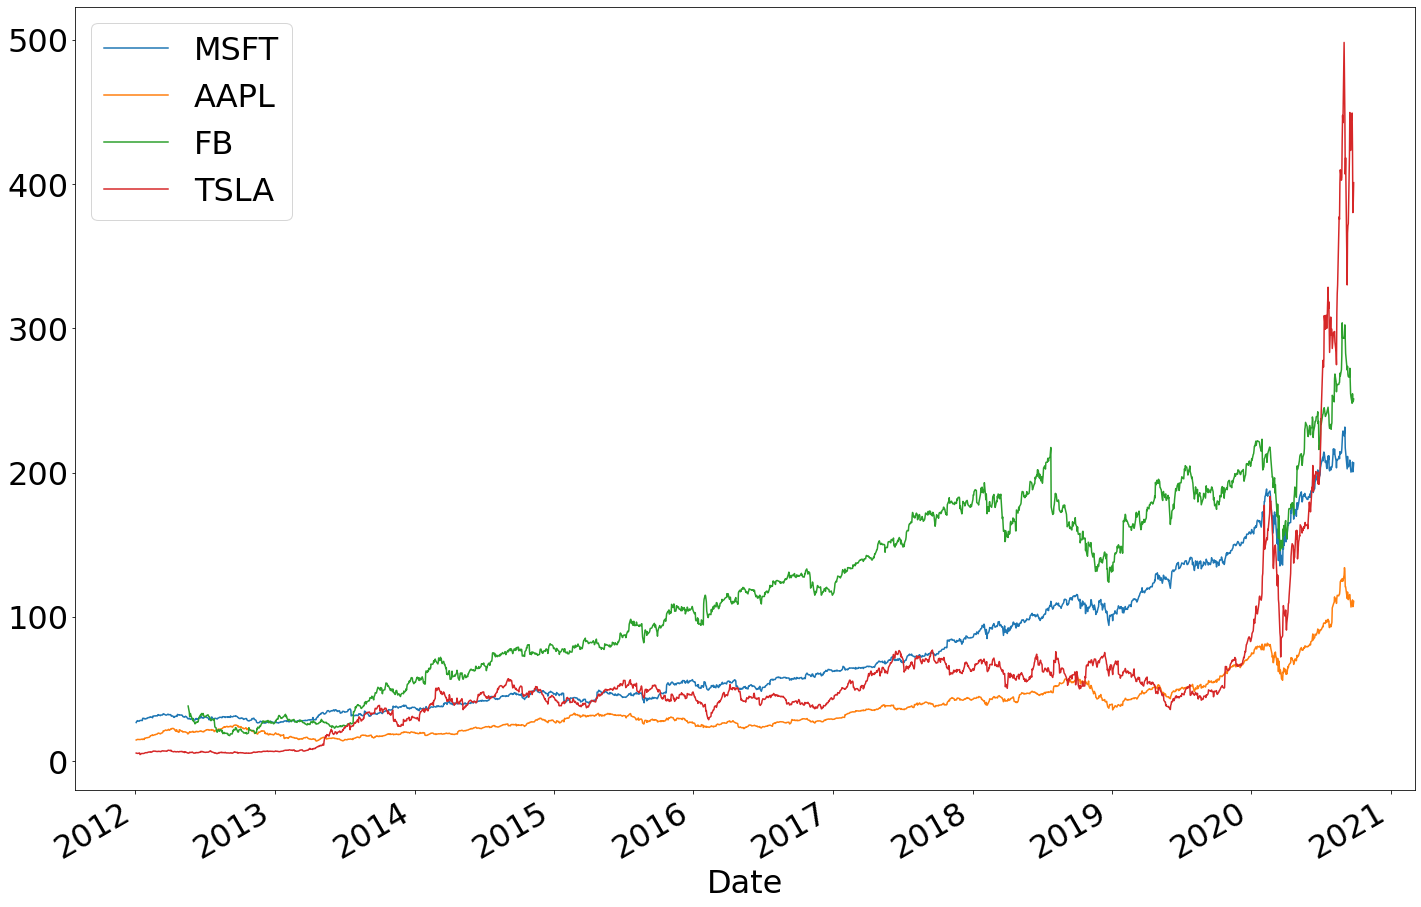

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#set default font size
plt.rcParams.update({"font.size": 32})

# create a new figure to use for plotting
fig, ax = plt.subplots(figsize = (24, 16))
close_data.plot.line(ax = ax, legend = True)

>**Let's reformat the y-axis values to make the table more readable**

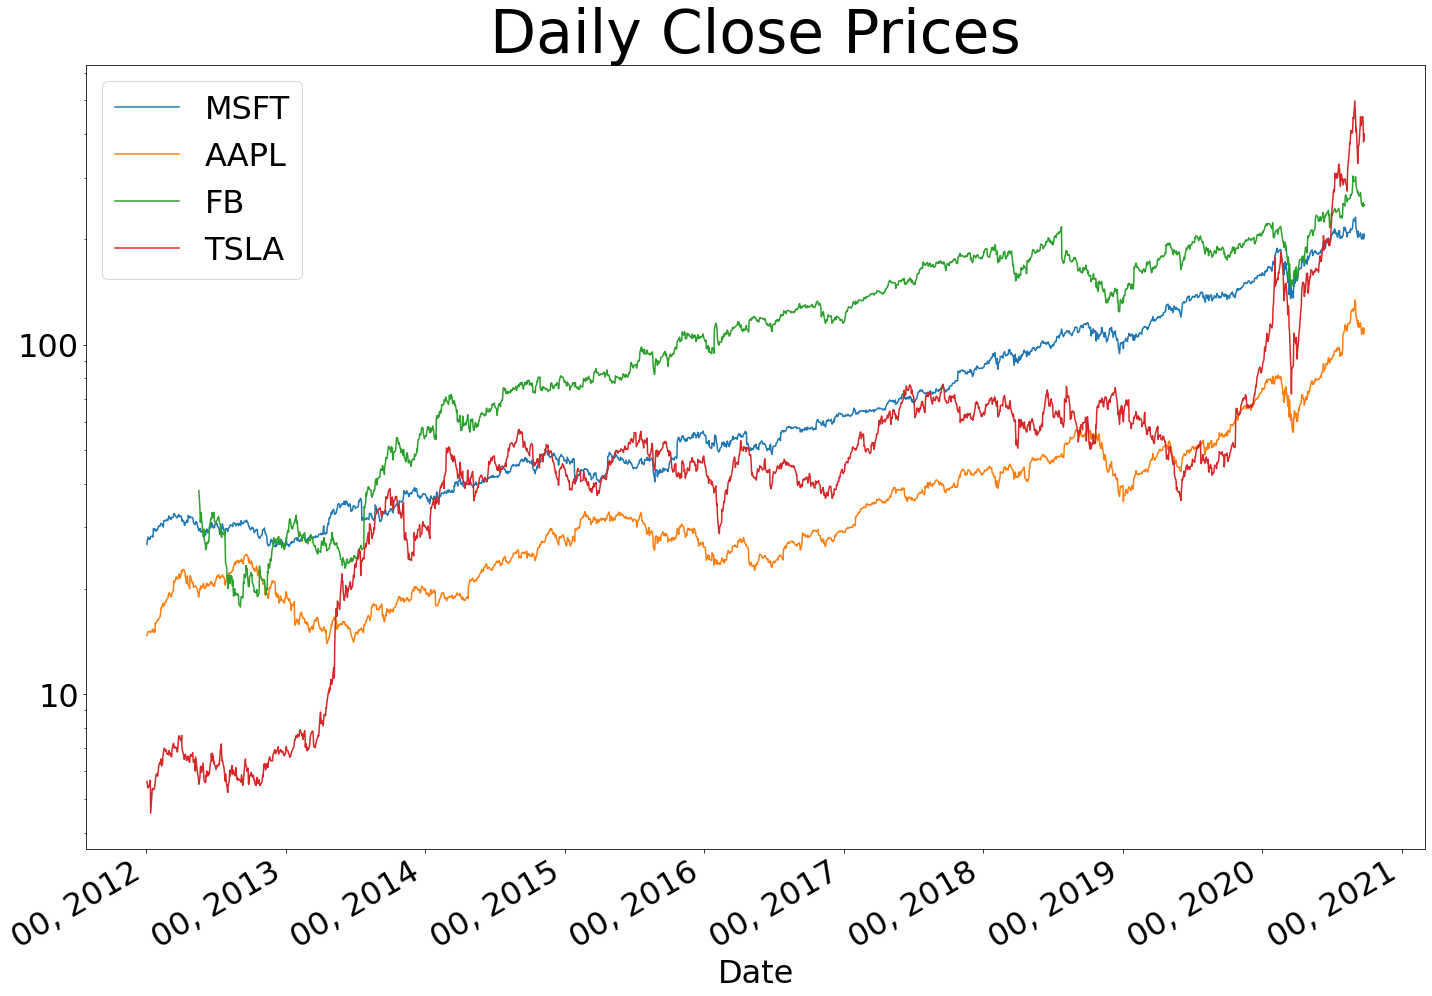

In [11]:
#set default font size
plt.rcParams.update({"font.size": 32})

# create a new figure to use for plotting
fig, ax = plt.subplots(figsize = (24, 16))
close_data.plot.line(ax = ax, legend = True)

# set y axis as logged to view changes in proportional terms
#instead of absolute terms

ax.set_yscale("log")

# generate a list of values for the axis
#ax.get_yticks() generates a list of the axis values for the y axis
y_vals = ax.get_yticks()

# reset y labels to integer from scientific notication 
#(so for e.g., y-axis lables should say 100 instead of 10^2, etc.)
reformat_values = [int(y) if y >= 1 else round(y,1) for y in y_vals]

# set axis labels with reformat_values instead of existing values
ax.set_yticklabels(reformat_values)

# to create/format the values on the x-axis to say 13 instead of 2013, for e.g.
# .index would represent the index or date values
reformat_x_values = close_data.index 
ax.set_xticklabels(close_data.index)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%M, %Y"))

# adding a title to the plot
plt.title("Daily Close Prices", fontsize = 60)

# plt.show() let's the program show the visualization
plt.show()

# plt.close() let's the program to delete it from it's memory after showing it
plt.close()


You may want to observe the rate of change in prices rather than the absolute value of prices - how they rise and fall over a given time period.

>For time series data, it's more ideal to use rates rather than levels (or absolute values). 
Time series data usually includes autocorrrelation which means today's value is based on yesterday's value plus or minus some change

In [12]:
# pct_change returns percent as decimals so we'll covert it to a percentage
price_change_data = close_data.pct_change() * 100
price_change_data

,MSFT,AAPL,FB,TSLA
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,2.353377,0.537415,NaN,-1.317670
2012-01-05,1.021900,1.110194,NaN,-2.129196
2012-01-06,1.553469,1.045381,NaN,-0.774333
2012-01-09,-1.316261,-0.158618,NaN,1.263468
...,...,...,...,...
2020-09-21,1.072905,3.032577,-1.734449,1.637458
2020-09-22,2.409403,1.571580,2.659684,-5.598701
2020-09-23,-3.292837,-4.194611,-2.249262,-10.341094


> **now let's create a scatter plot to visualize the trend changes over time using matplotlib**


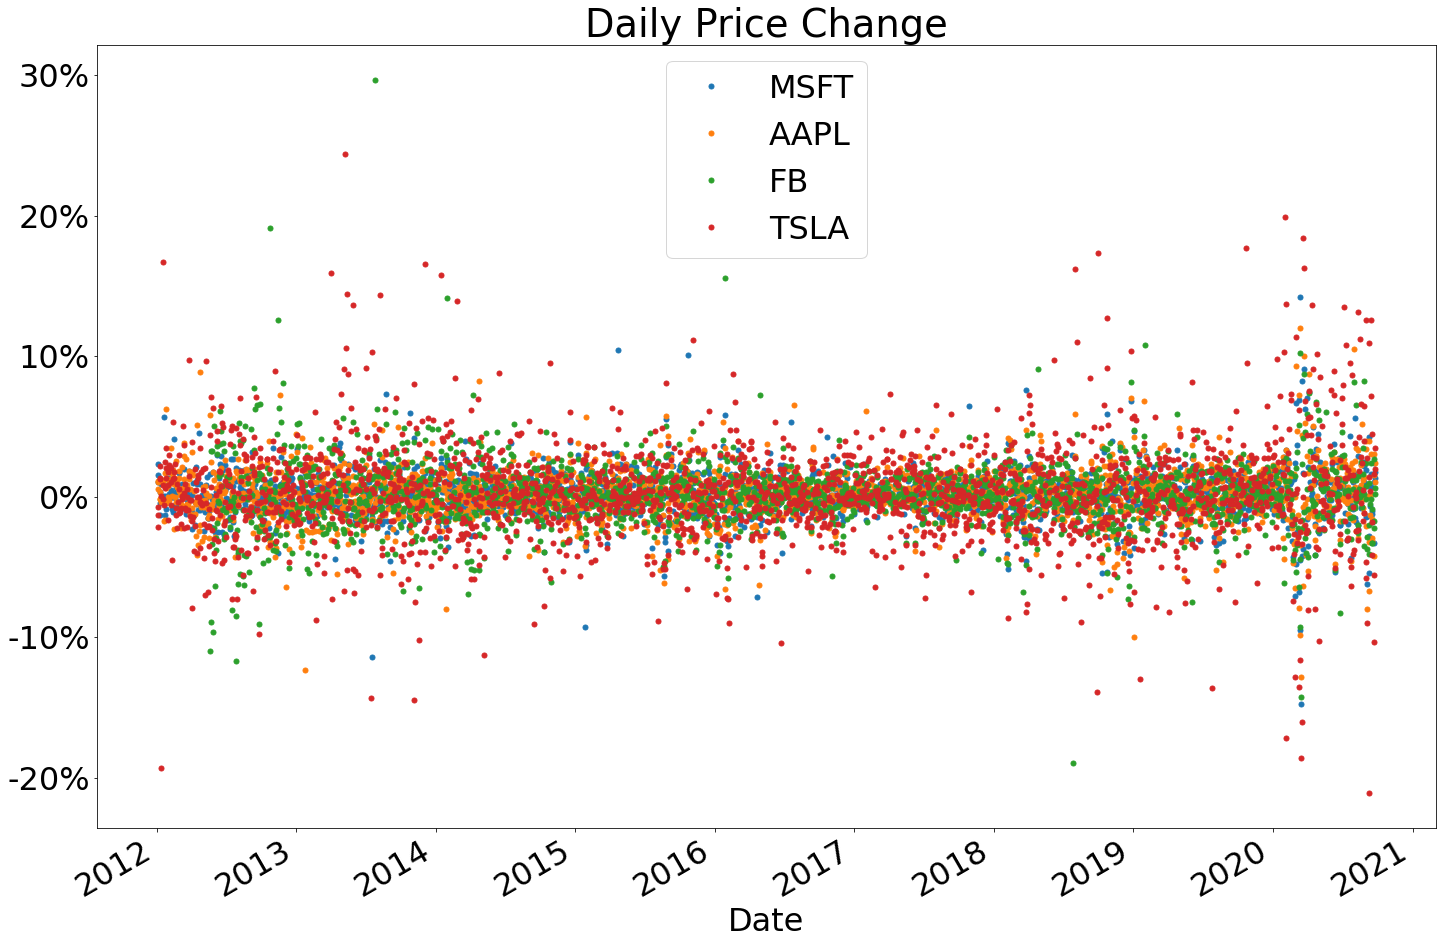

In [13]:
# set default font size
plt.rcParams.update({"font.size": 32})

# make a new figure with plt.subplots
fig, ax = plt.subplots(figsize = (24, 16))

# for each key in price_change_data, plot using "." as the marker and ls to ""(blank). 
# ls "" tells the program not to plot a line, only plot points. 
# if you also want to plot lines, remove ls="" from the code or define the line type, e.g. ls="--", ls="-.", ls="-"
for key in price_change_data:
    
    #price_change_data[key].scatter()
    price_change_data[key].plot.line(marker =".", markersize = 10, ls ="", ax=ax)
    
# add a legend.
# plt.legend() without including a (loc) command will automatically find the best location for the legend.
# use loc: to define a location for the legend.     
plt.legend(loc = "upper center")

#add a title
plt.title("Daily Price Change")

# access the values on the y-axis and transform them to string with %
y_vals = ax.get_yticks()
reformat_y_vals = [str(int(y)) + "%" for y in y_vals]
ax.set_yticklabels(reformat_y_vals)

plt.show()
plt.close()


### Visualizing Distribution
Next, we'll visualize the distribution of price change data. In the same visualization, we'll include summary statistics

In [14]:
stats_df = gather_statistics(price_change_data)
stats_df

,MSFT,AAPL,FB,TSLA
mean,0.106,0.108,0.117,0.256
median,0.069,0.089,0.107,0.122
variance,2.673,3.229,5.557,12.333
S.D.,1.635,1.797,2.357,3.512
skewness,0.000,0.000,0.000,0.000
kurtosis,14.221,10.030,22.324,9.498


Next, we'll build a histogram using pandas and matplotlib.

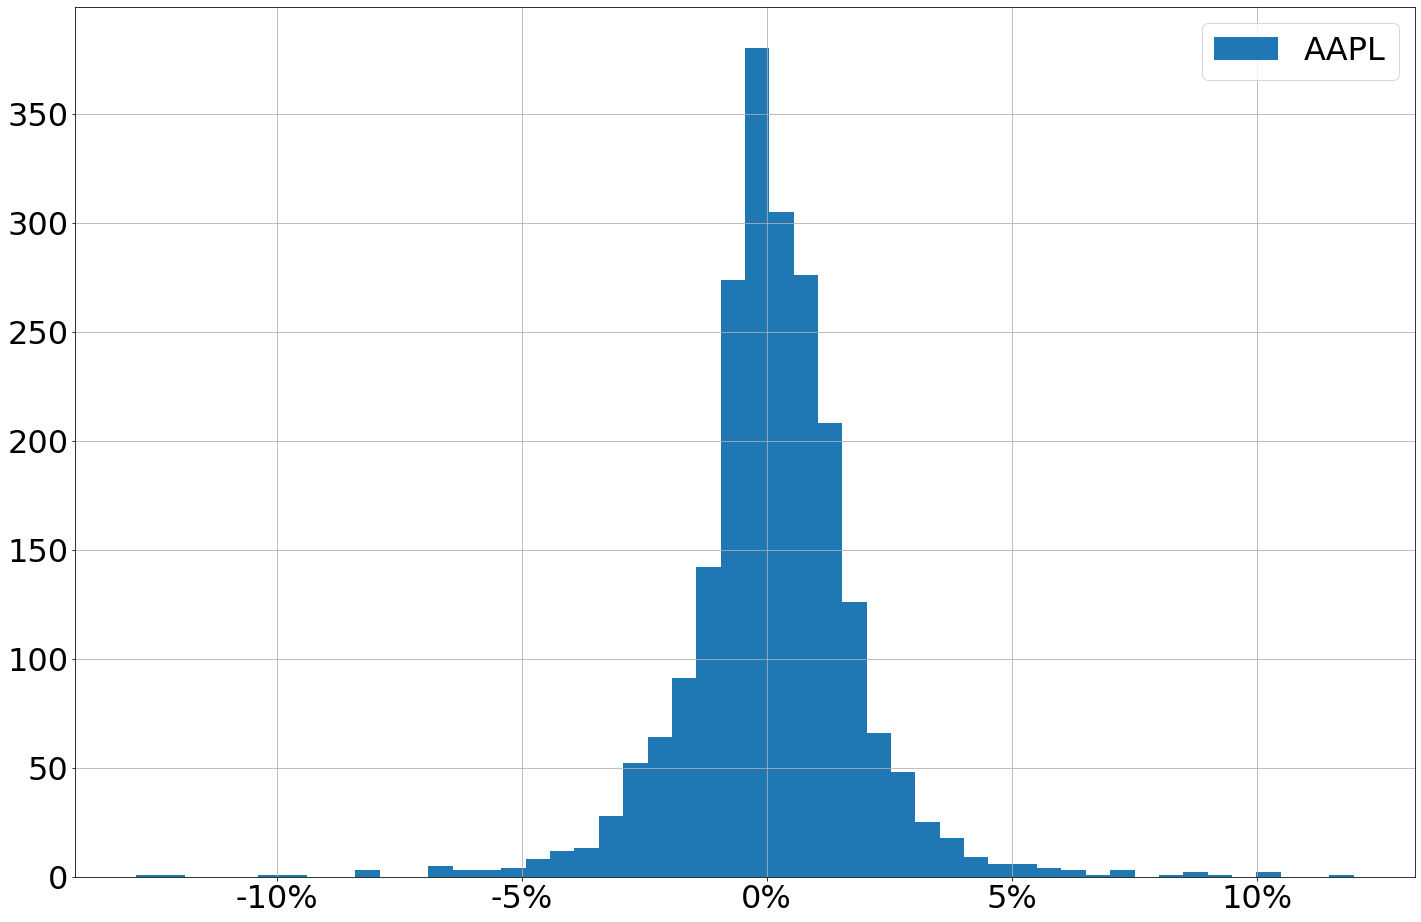

In [15]:
fig, ax = plt.subplots(figsize =(24,16))

# use df.hist() to create histogram
# bins identify the number of discrete divisions in the data
price_change_data["AAPL"].hist(bins = 50, label = "AAPL")
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])

plt.legend()

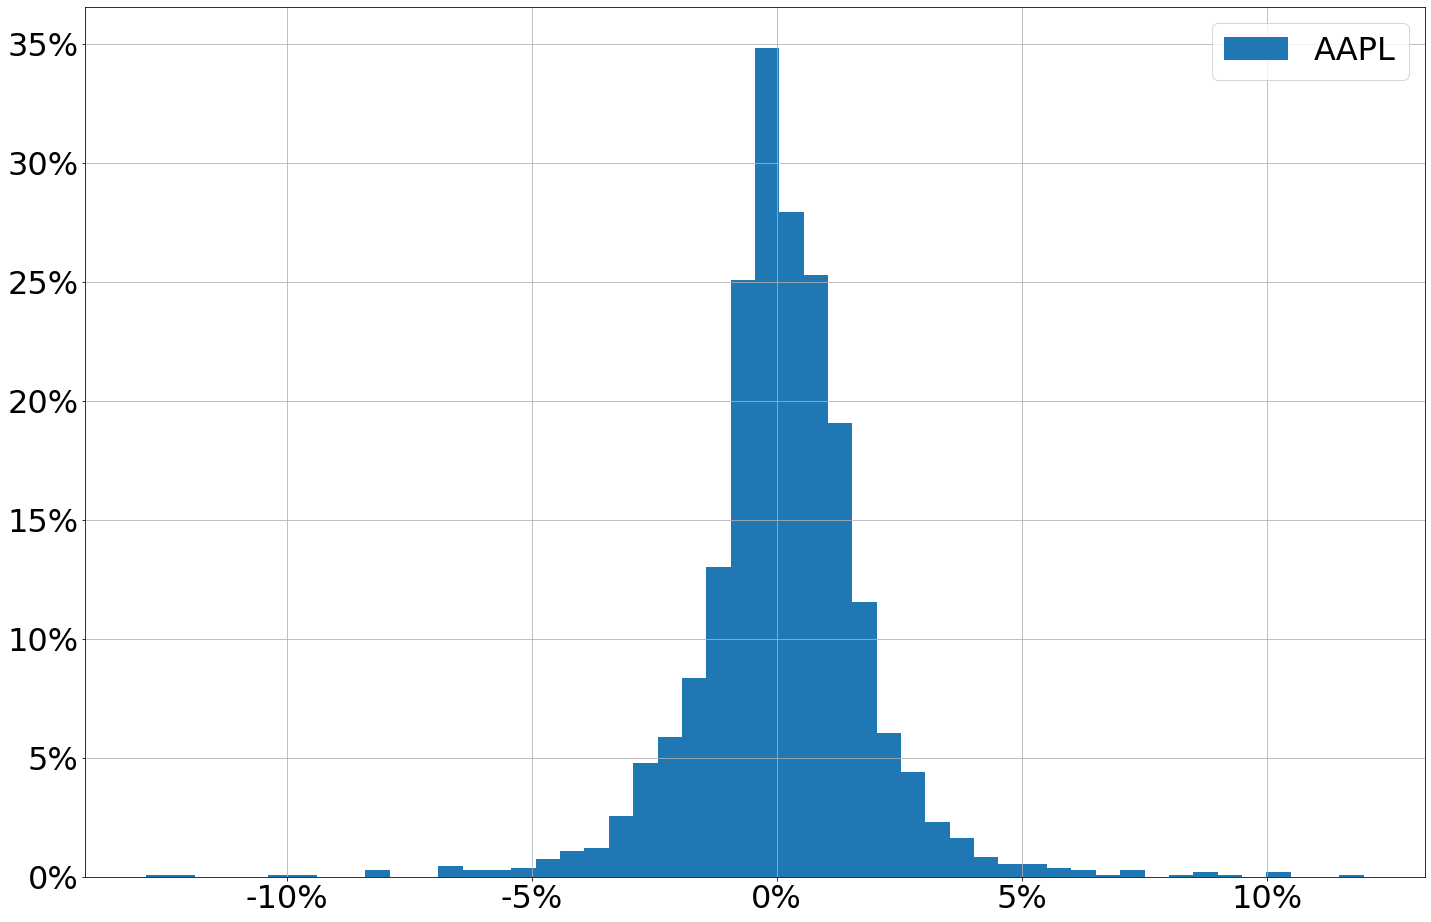

In [16]:
fig, ax = plt.subplots(figsize =(24,16))

# use df.hist() to create histogram
# bins identify the number of discrete divisions in the data
price_change_data["AAPL"].hist(bins = 50, label = "AAPL", \
                               density = True)
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])

# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels(str(int(y * 100)) + "%" for y in y_vals)

plt.legend()

We can also create multiple plots

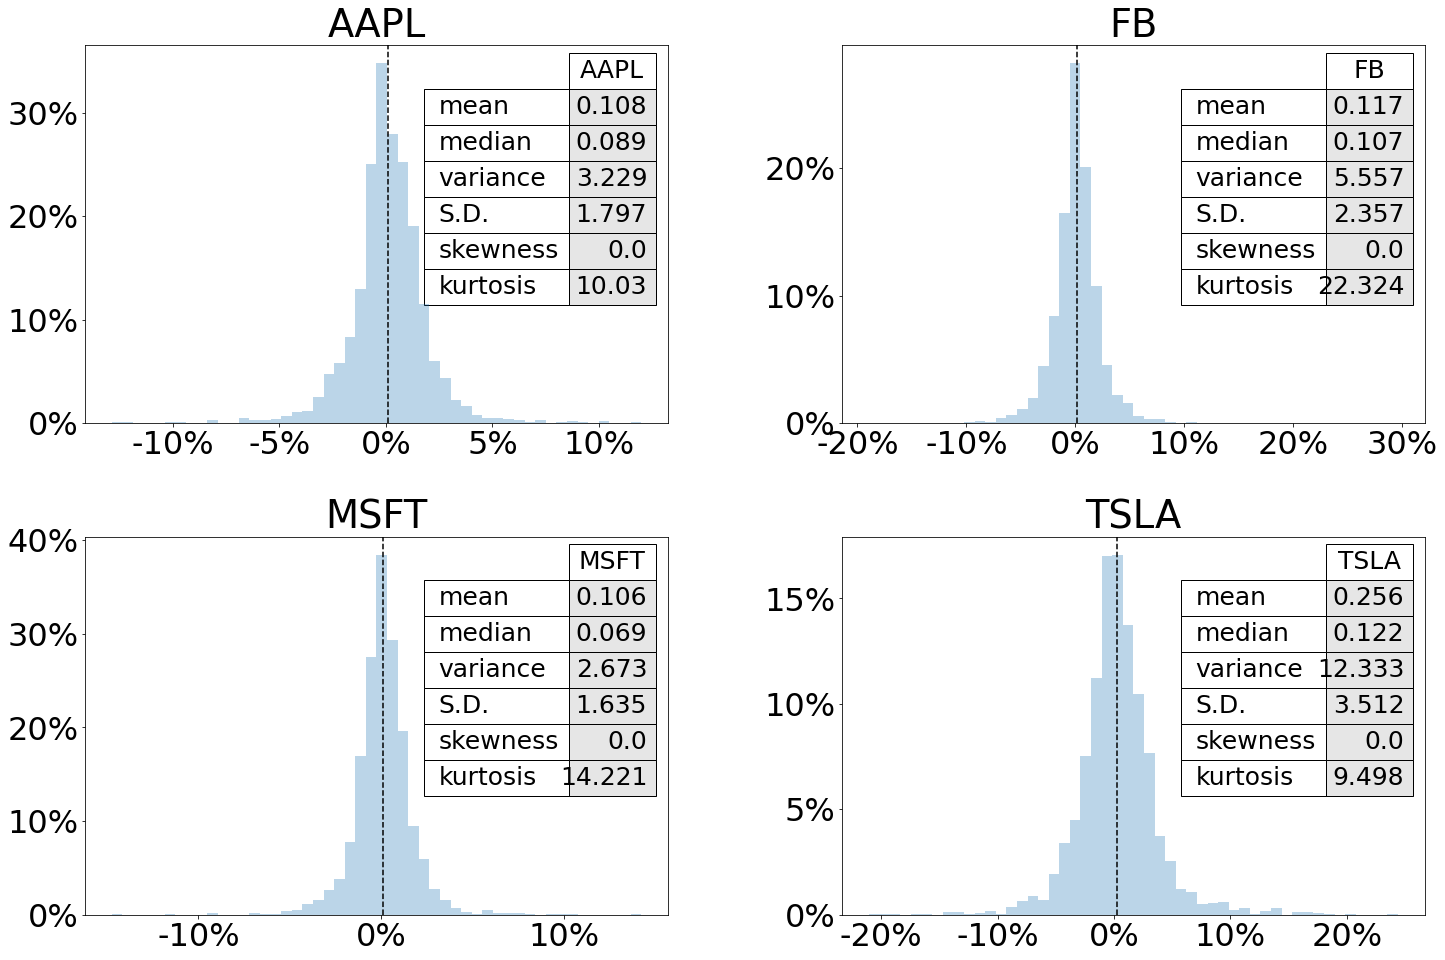

In [19]:
#import table from pandas.plotting to create a table using the df
from pandas.plotting import table

#plt.subplots(2,2..) makes ax a 2*2 list (2 plots accross and 2 down)
fig, ax = plt.subplots(2,2, figsize =(24, 16))
price_change_data.hist(bins = 50, alpha = 0.3, ax = ax,
                       label = price_change_data.keys(),
                       density = True)

#plotting table with summary statistics

# note that the 4 diagrams as seen in the results below doesn't simply make up 1 diagram with 4 histograms.
# rather, they are 2 lists that contain 4 different diagrams placed with distinct coordinates. 
# So, 1 list contains 1 diagram on the top left and another on the top right,
# Another list contains 1 diagram on the bottom left and 1 on the bottom right. 
# we use a for loop to cycle through these coordinates and create a summary statistic for each of the histograms
# note: ax is a list of lists (2,2)
# a list of lists has a list for each element of the list
# so, ax [i][j]==[[a1, a2],[a3, a4]] or ax [i][j]==[[AAPL, FB], [MSFT, TSLA]]
for i in range(len(ax)):
    for j in range(len(ax[i])):
        a = ax[i][j]
# identify stock
        stock = a.get_title()
# save summary statistics data
        summ_data = stats_df[stock]
#plot summary statistics within the histogram plot
        stats = table(a, summ_data, colWidths = [0.1], 
                      # make cells grey for where output is
                      cellColours=[[(0.9,0.9,0.9)]]*6, #there'll be 6 plots so *6 says replicate the colors 6 times
                      loc = "upper right")

# make the table larger (xscale, yscale)
        stats.scale(1.5, 3)
        
# we don't want to use the default font size for the table since it's too small so we set auto font size to false
        stats.auto_set_font_size(False)
    
# then we define the font size we want to use for the table  
        stats.set_fontsize(25)
    
# mark the mean with a vertical line
        a.axvline(x = summ_data.loc["mean"], ls="--",
                 color = "k") #color = k means black
    
# set horizontal axis values as a percent (note that the y-axis represents % change in stock prices)
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x)) + "%" for x in x_vals])
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100)) + "%" for y in y_vals])
        
# turn of grid lines
        a.grid(False)
       
plt.show()
plt.close()
                      

Notice that kurtosis is the largest for facebook followed by Microsoft. This might seem strange since higher kurtosis values tend to indicate fatter tails for a distribution. So, why is it that the tamest distribution in terms of the size of S.D. has the second highest kurtosis value? (hint: look at the rate of S.D. in calculating kurtosis)

For a more convenient comparison, we can also plot each histogram transparently on a single plot for easier comparison. 

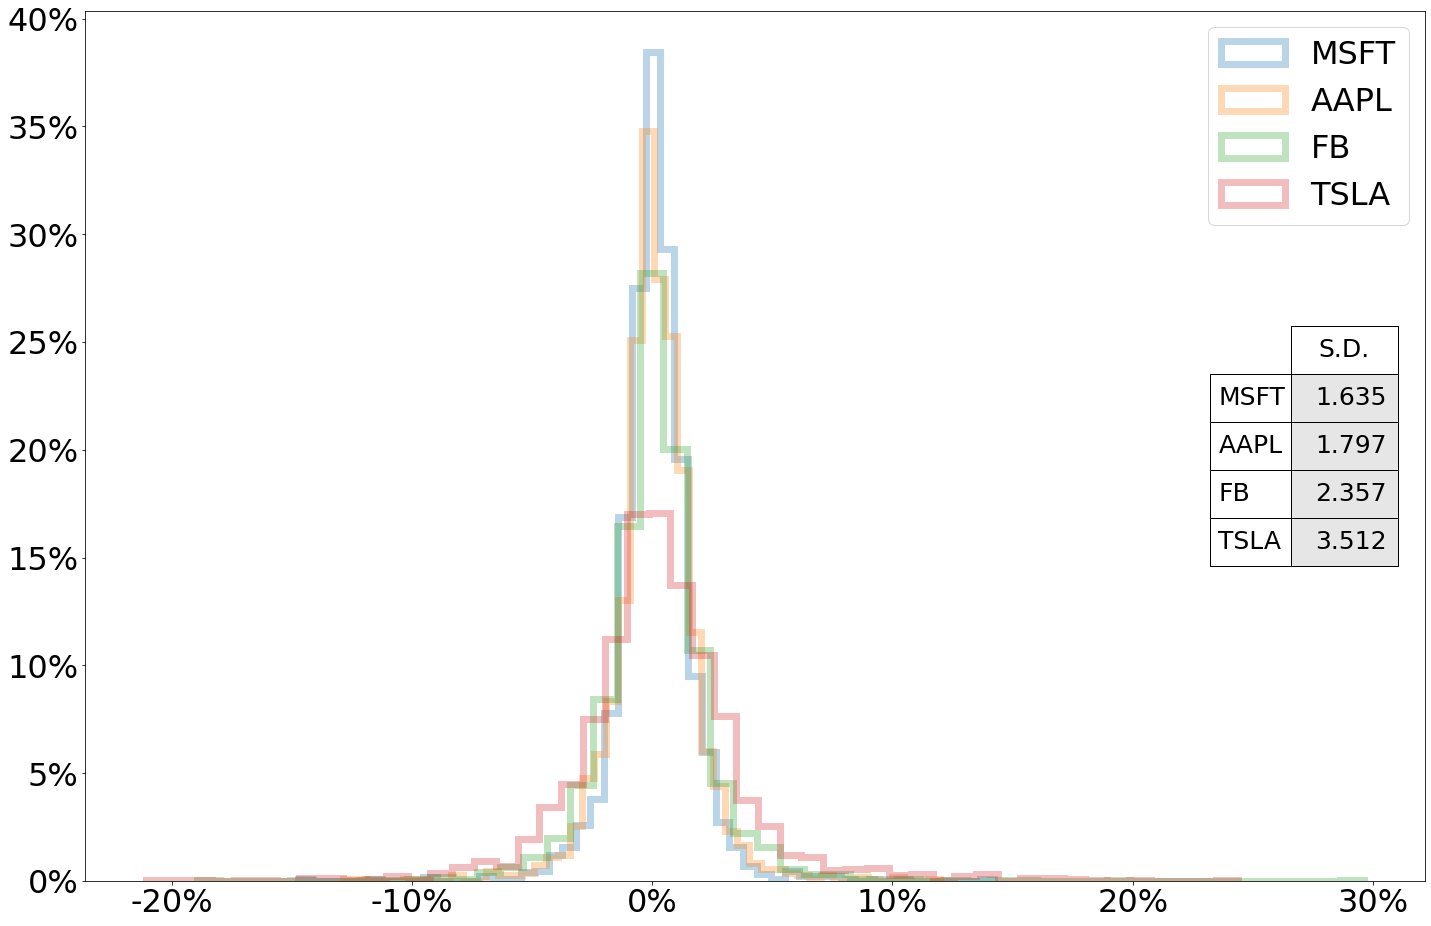

In [44]:
# create a figure
fig, ax = plt.subplots(figsize = (24, 16))

# plot the distribution of each price data on the figure
for key in price_change_data:
    price_change_data[key].hist(bins=50, histtype= "step", 
                                alpha = 0.3, label = key, #alpha = 0.3 to make the plot transparant or see through
                                linewidth = 7, density = True) #density = true treats the fig as a continuous
                                                                #distribution rather than a hist, although it is a hist.
# set horizontal values as a percent
x_vals = ax.get_xticks()

#make string out of each x_vals value as an integer and add %
x_vals = [str(int(x)) + "%" for x in x_vals]
ax.set_xticklabels(x_vals)

# set vertical axis values as a percent
y_vals = ax.get_yticks()
y_vals = [str(int(y * 100)) + "%" for y in y_vals]
ax.set_yticklabels(y_vals)

# include a table with the Standard dev. of each stock
stats = table(ax, stats_df.loc["S.D."], #.loc is going to get the S.D. row only and will leave out the column
              colWidths = [0.1], 
              cellColours = [[(0.9,0.9,0.9)]] * 4, #*4 means it'll show the S.D for 4 stocks, 
                                                    # [.9,.9,.9] represents R,B,G colors
              loc = "center right")

# rescale dimension x and y in table (resize the table)
stats.scale(0.8, 4)

#Turn off auto font size feature
stats.auto_set_font_size(False)

#set a font size
stats.set_fontsize(25)

# turn gridlines off
ax.grid(False)

#legend draws from label values passed in df.hist()
plt.legend(loc = "upper right")
                                                                

As we can see from the above plot, microsoft has the least variance and their distribution is narrower with slimmer tails which means they are a better option for a risk averse investor. Tesla on the other hand has a greater volatility volatility i.e. a higher Standard. dev so their aren't the best option for an investor who doesn't want to take higher risks. 

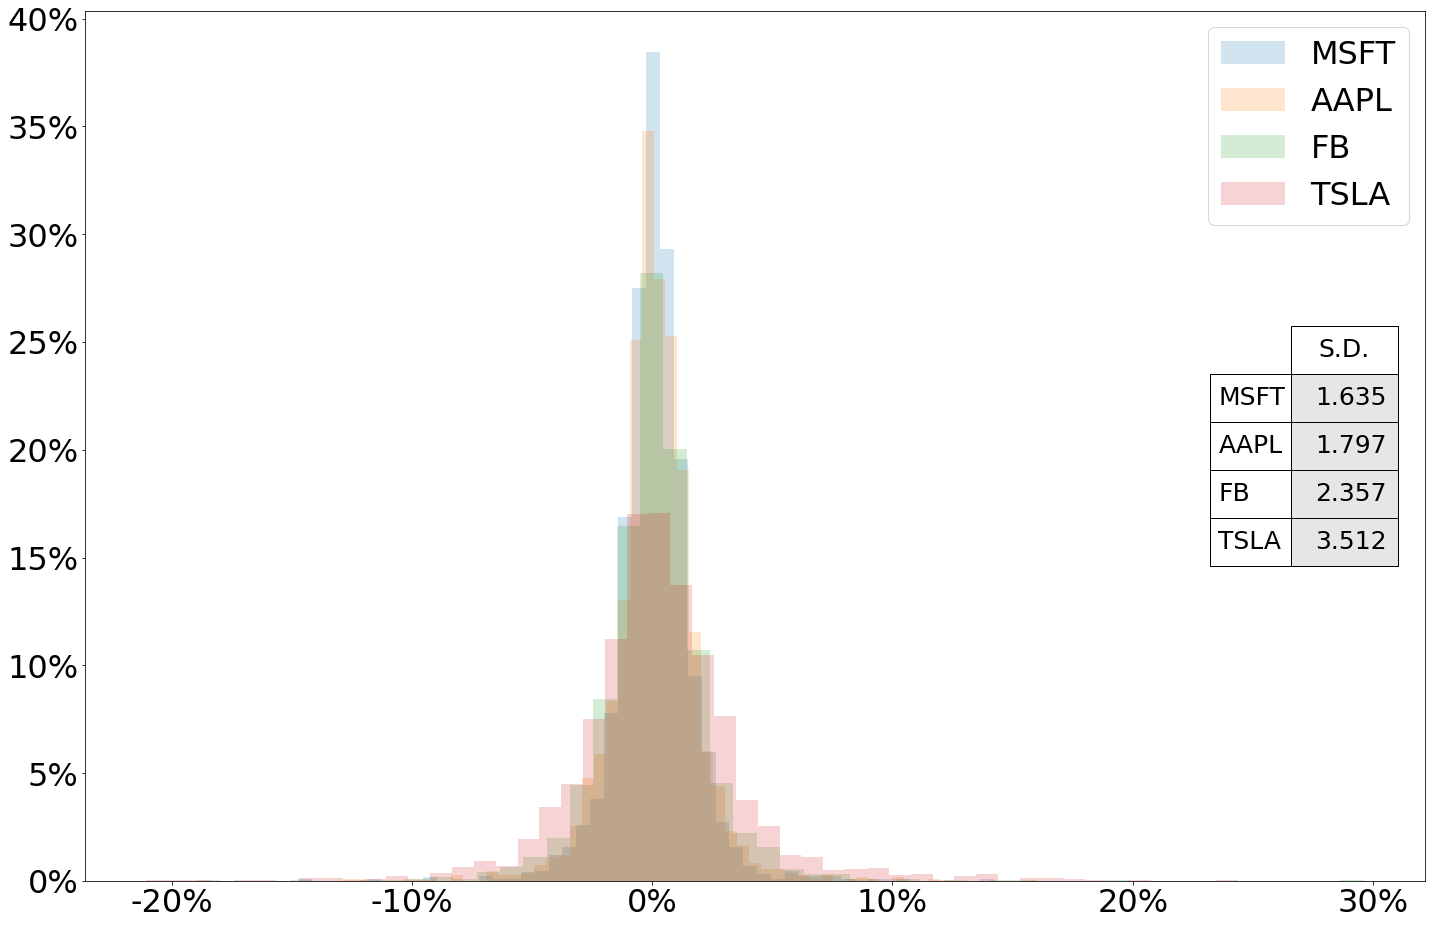

In [46]:
# create a figure
fig, ax = plt.subplots(figsize = (24, 16))

# plot the distribution of each price data on the figure
for key in price_change_data:
    price_change_data[key].hist(bins=50, alpha = 0.2, label = key, density = True) 
    
# set horizontal values as a percent
x_vals = ax.get_xticks()

#make string out of each x_vals value as an integer and add %
x_vals = [str(int(x)) + "%" for x in x_vals]
ax.set_xticklabels(x_vals)

# set vertical axis values as a percent
y_vals = ax.get_yticks()
y_vals = [str(int(y * 100)) + "%" for y in y_vals]
ax.set_yticklabels(y_vals)

# include a table with the Standard dev. of each stock
stats = table(ax, stats_df.loc["S.D."], #.loc is going to get the S.D. row only and will leave out the column
              colWidths = [0.1], 
              cellColours = [[(0.9,0.9,0.9)]] * 4, #*4 means it'll show the S.D for 4 stocks, 
                                                    # [.9,.9,.9] represents R,B,G colors
              loc = "center right")

# rescale dimension x and y in table (resize the table)
stats.scale(0.8, 4)

#Turn off auto font size feature
stats.auto_set_font_size(False)

#set a font size
stats.set_fontsize(25)

# turn gridlines off
ax.grid(False)

#legend draws from label values passed in df.hist()
plt.legend(loc = "upper right")
                                                                

As seen in the fig above, we can fill the space below the curves to indicate the area under each curve. To do that, we removed "histtype = step". We also removed the "linewidth" feature.